## import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import category_encoders as ce
from datasist.structdata import detect_outliers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Reading the dataframe

In [2]:
df = pd.read_csv('GamingStudy_data_csv.csv')
df.head()

S. No.    Timestamp  GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  \
0       1  42052.00437     0     0     0     0     1     0     0   
1       2  42052.00680     1     2     2     2     0     1     0   
2       3  42052.03860     0     2     2     0     0     3     1   
3       4  42052.06804     0     0     0     0     0     0     0   
4       5  42052.08948     2     1     2     2     2     3     2   

                   GADE  ...  Birthplace    Residence  Reference  \
0  Not difficult at all  ...         USA          USA     Reddit   
1    Somewhat difficult  ...         USA          USA     Reddit   
2  Not difficult at all  ...     Germany      Germany     Reddit   
3  Not difficult at all  ...         USA          USA     Reddit   
4        Very difficult  ...         USA  South Korea     Reddit   

                                           Playstyle  accept GAD_T SWL_T  \
0                                       Singleplayer  Accept     1    23   
1              Multiplayer - online - with strangers  Accept     8    16   
2                                       Singleplayer  Accept     8    17   
3  Multiplayer - online - with online acquaintanc...  Accept     0    17   
4              Multiplayer - online - with strangers  Accept    14    14   

   SPIN_T Residence_ISO3 Birthplace_ISO3  
0     5.0            USA             USA  
1    33.0            USA             USA  
2    31.0            DEU             DEU  
3    11.0            USA             USA  
4    13.0            KOR             USA  

[5 rows x 55 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. No.           13464 non-null  int64  
 1   Timestamp        13464 non-null  float64
 2   GAD1             13464 non-null  int64  
 3   GAD2             13464 non-null  int64  
 4   GAD3             13464 non-null  int64  
 5   GAD4             13464 non-null  int64  
 6   GAD5             13464 non-null  int64  
 7   GAD6             13464 non-null  int64  
 8   GAD7             13464 non-null  int64  
 9   GADE             12815 non-null  object 
 10  SWL1             13464 non-null  int64  
 11  SWL2             13464 non-null  int64  
 12  SWL3             13464 non-null  int64  
 13  SWL4             13464 non-null  int64  
 14  SWL5             13464 non-null  int64  
 15  Game             13464 non-null  object 
 16  Platform         13464 non-null  object 
 17  Hours       

In [4]:
df.shape

(13464, 55)

### DATA CLEANING :

In [5]:
## DROP COLUMNS THAT WE WILL NOT NEED IT:
df.drop(['S. No.' , 'Timestamp' ,'earnings' ,'accept' , 'Degree' ,'Birthplace_ISO3' ,'Birthplace', 'Residence_ISO3' ,  'highestleague' , 'Reference','earnings'] ,axis= 1, inplace = True)

In [6]:
## GET THE UNIQUE VALUES:
for i in df:
    print('**',i,':')
    print('-->' ,df[i].unique())
    print('-'*20)

** GAD1 :
--> [0 1 2 3]
--------------------
** GAD2 :
--> [0 2 1 3]
--------------------
** GAD3 :
--> [0 2 3 1]
--------------------
** GAD4 :
--> [0 2 3 1]
--------------------
** GAD5 :
--> [1 0 2 3]
--------------------
** GAD6 :
--> [0 1 3 2]
--------------------
** GAD7 :
--> [0 1 2 3]
--------------------
** GADE :
--> ['Not difficult at all' 'Somewhat difficult' 'Very difficult' nan
 'Extremely difficult']
--------------------
** SWL1 :
--> [3 2 5 7 6 1 4]
--------------------
** SWL2 :
--> [5 6 2 4 3 7 1]
--------------------
** SWL3 :
--> [5 2 4 3 6 7 1]
--------------------
** SWL4 :
--> [5 2 3 6 1 7 4]
--------------------
** SWL5 :
--> [5 1 2 3 7 6 4]
--------------------
** Game :
--> ['Skyrim' 'Other' 'World of Warcraft' 'League of Legends' 'Starcraft 2'
 'Counter Strike' 'Destiny' 'Diablo 3' 'Heroes of the Storm' 'Hearthstone'
 'Guild Wars 2']
--------------------
** Platform :
--> ['Console (PS, Xbox, ...)' 'PC' 'Smartphone / Tablet']
--------------------
** Hours :
-

#### HOURS COLUMN

In [7]:
# Number of hours in a week devoted to playing so must don't be more than 168 if the player sleep just 4 hours per day so it will be 164 hours
df.drop((df[df['Hours'] > 164].index ), axis=0 ,inplace = True)

#### WHYPLAY COLUMN

In [8]:
### group all of unique values in  (Having_fun , Improving , Winning , Relaxing , All of the above)
df['whyplay'].value_counts()

whyplay
having fun                                                                          5289
improving                                                                           4927
winning                                                                             2090
relaxing                                                                             654
All of the above                                                                      26
                                                                                    ... 
Making my brain go numb                                                                1
Combination: Winning / Having fun                                                      1
Improving + Fun                                                                        1
to be occupied                                                                         1
Mental priority is Fun>Improve>Win, actual priority once in game Win>Improve>Fun       1
Name: count, 

In [9]:
df['whyplay'].value_counts().count()

406

In [10]:
having_fun = ["I play it as I watch TV or movies.  I've gone through many a Netflix binge with Isaac." , 'passing the time' , 'having fun and improving',
             'Improving AND having fun (kinda wish I could pick more than one)' ,'Being with friends' , 'Wasting time', 'talking to irl friends',
             'playing well' , 'having a distraction' , 'passing time' , 'conpeting, the fun that comes with it', 'mental stimulation',
              'Not beeing bored' ,'spend time with my best friend(s)', 'spending time with special person', 'Not getting bored.', 
              "Distracting myself from the multiple disorders I have on bad days while on good days I don't play as much.",
              'I mostly play out of habit.' , "'With friends having fun, alone improving'" , 'playing with friends' ,'Working as a team',
              'Habit' , 'not having retarded teammates' ,'just wasting time as i have nothing else to do in life', 'metting new people', 'distraction',
              'time with friends' , 'occupation', 'Not feeling the pain my mind can inflict on me','i have fun when i see myself getting better at the game',
              'Myself doing well (KDA)' , 'Getting to the top of the boards' , 'having fun with friends' , 'being better than the majority', 'playing the game',
              'killing time', 'Teamwork' , 'Having fun is the reason we all start to play a game.' , 'to pass time' , 'Having fun together WITH friends',
              'content way to waste time', 'Doing well (not bringing my team down)' , 'having fun by giving it your best shot.' , 'Time with friends',
              'All but relaxing, but mostly fun' , 'chasing singed and killing Teemo' , "I Have no idea why I'm playing." , 'to kill time',
              'having something to do' , 'getting away from real life' , 'Keeping my mind off my shortcomings.' , 'play with friends',
              'Feeling that I performed well' , 'Taking focus off of work' , 'being satisfied with my skill' , 'Making it my living',
              'Playing my best and having competent teammates',"If it's not fun, I won't do it, however I want to get good at League because it can be challenging to get good at, it's something to work on in life and it's extremely fun so why the fuck not!",
              "I don't know anymore" , 'not arguing, focusing on gameplay' ,'competing' , 'The KDA!' , 'Keeping myself occupied' , 'Passing time/Distracting myself from worrying',
              'Having fun by spending time with my friends :D' , 'distracting myself',
              'the other team losing', 'Playing well ', 'Shitting on the sea anemones', 'Playing the game' , 'Doing well', 
            'The people I play with, the game is less important' ,'having fun & passing time' , 'having fun in some and winning in some ' ,'fun doing my best and wining isnt bad']


Improving = ['Having fun and improving at the same time' ,'Improving and having fun.' , 'improving while having fun' ,'winning and improving',
             'winning whilst improving' , 'improving & having fun' , 'fulfilling a concept that you created based on the resources that are given to you by the game',
             'Improving and having fun' , "winning and improving, it's stoped being about fun a long time ago, but fun is still there",
             'improving or having fun, depending whether or not I am playing with friends or not' , "winning and improving, it's stoped being about fun a long time ago, but fun is still there",
             'both, improving and having fun' , 'Improving and relaxing too' , 'Winning AND Improving' , 'Being better than my friends' ,
             'Working together for an objective, stopping people abusing each others' , 'Performing', 'Improving and Having fun',
             'both improving and relaxing' , 'improving AND relaxing' , 'A combination of fun (with friends,) and improving (in competitive)',
             'Having fun and Improving', 'competeing' , 'Improving/ Having fun equal','improving, having fun, relaxing','Both improving and having fun are equally important to me.',
             'Improving, having fun & winning' , 'Improving + Fun' , 'improving and having fun' , 'Having fun and improving' , 'Making my brain go numb',
              'Improving, relaxing and having fun are equally important to me and tied so close, that they cannot exist without each other (e.g. I can only have fun while relaxing and I always try to improve while relaxing and having fun),',
             'Both having fun and improving.','Improving while having fun' , 'competitive play, improving but in games that are winnable',
             'Having fun and improving 50/50', 'learning how the game works and compare to other games','both winning and improving, one brings the other',
             'improving and watching myself getting higher on ladder' , 'depends on the match type. but having fun and improving means alot ',
             'Improving and winning' , 'improving + having fun' , 'mix between winning and improving ' , 'improving and winning',
            'Getting better at the game.','winning+improving','both improving and having fun equally important' ,  'Alternates between improving and having fun' ,'learning',
             'Winning and improving. Both.' , 'Having fun, but to enjoy competetive games you must be good. Therefore improving as well. ',
             'having fun by improving' , 'Both Improving and having fun' , 'Mix of improving and having fun. ' , 'improving,relaxing', 
             'Improving but also having fun :)' ,'Learning', 'helping others' , 'improving when playing alone, having fun with friends' , 'Improvement and enjoyment',
             "I'm competetive minded - improving/winning " , 'Improving + Having fun' , 'improving mostly, but having fun as well',
             'Winning and improving' , 'A mix of having fun and improving' , 'both improving and having fun' , 'mix between having fun and improving',
             'Challenging my brain and having fun while improving','Both winning and improving quite equally' , 'winning and improving,i have fun doing this.',
             'improving means winning means having fun' , 'Improving, having fun, and teaching my friends','Improving & having fun are equally important to me.',
             'not losing my time and improve' ,  'Winning and improving at the same time' ,'win and improve','winning AND improving',
             'having fun and improving are equalimy important tho' , 'because im not able to check 2, Improving and having fun.',
             'improving OR having fun depending on friend group' ,'Having fun while improving' , 'Having fun and Improving (:',
             'some kind of improving and having fun' ,'Learning/Strategizing', 'improve to find a team and win','improving, having fun' ]

Winning = ['winning' , 'have fun and win' , 'Winning 55% improving 45%' , 'winning + having fun' , "Having fun and winning (or at least trying to win, I dislike playing without the goal of winning.) You play a game to win, which doesnt mean you can't have fun :) Doesnt mean losing cant be fun tho. ",
           'winning because if i lose while boosting i wont get money ' , 'Winning is the most fun but I sometimes still have fun if I loose',
           'Winning & having fun' , 'having fun while winning' , 'winning while having fun' , 'having fun and winning (its part of having fun for me)',
           'Winning is funner' , 'haivng fun and winning equally important' , 'A little bit of both to be honest. I play because its fun, but I prefer winning over losing obviously.',
           'Winning and having fun ' , 'Both winning and having fun' , 'having fun=winning' , "winning is having fun. I can't choose between the two.",
           'having fun but still winning ' ,'winning while improving', 'Having fun while winning.', 'winning and having fun 50/50','having fun and winning is not bad either',
           'Having fun, expecially when winning', 'destroying the enemy', 'Combination: Winning / Having fun' , 'Winning while having fun','individual performance and winning together',
           'dumpster the enemy beyond words' ,  "Winning and having fun, I'm a sporty person so I'm competitive." ,'winning/having fun',
           'winning is fun but can have fun games without winning' ,'Performing well' ,  'Depends on the mindset. Who am I playing with? It might be winning if I feel like being competitive, or just having fun.',
           'sometimes winning; sometimes having fun' , 'having fun and winning equally important, willing to lose if having fun...etc',
           'having fun, but winning is fun' , 'competition' , 'Winning and having fun' , 'fun is winning, so winning' ,'depends, winning or having fun',
           'Having fun and winning'  ,'having fun and winning', 'while winning, but loss is not a problem' , 'Having fun, but who plays to lose? ;)' , 'Winning AND having fun!',
           'winning and having interesting plays' , 'Winning or having fun' , 'Competition' , 'depends, if playing with friends having fun otherways winning',
           'Winning and Having Fun' ,'Equally value winning and having fun','I wish it was having fun, but unfortunately its winning' , 'winning and improving at the same time having fun',
           'playing with friends and winning with them as a team' ,'improving AND winning are equally important to be honest. so...', 'winning and fun evenly' , 'Winning with friends, winning while alone is almost depressing.',
           'winning, while having fun' , 'Depends on the time, sometimes I just want to win, other times I just want to have fun.',
           "winning, but only when it's earned through effort" , 'combination of having fun and wining' ,  'Winning + Improving',
           'Improving & Winning' ,'Ranked = winning Normals = Fun','Winning while having fun his by far the best thing' , 'Winning and improving.' , 'both winning and improving ',
           'getting better so i can win more ', 'a good challenge','playing good','Reaching goal i.e. GM ', 'Winning and improving, i have fun when succeeding and i have learned to value losing.','Winning and improving - equally',
          'Winning/improving ' ,'winning helps with fun']

Relaxing = ['relaxing' , 'Forgetting troubles' , 'getting good loot', 'Forgetting about my drug addiction','not thinking about my clinic depression.',
            'relaxing+having fun','both relaxing and having fun', 'forgetting','fun and relaxing' ,'Relaxing without improving or the other way rounds is a waste for me, so both.',
            'Haveing fun and relaxing', 'Distraction' ,'satisfaction', 'it just works as a distraction. other then that winning and climbing that ladder',
            'to be occupied', 'forgetting about the reality','Crushing kids ' , 'relaxing and having fun', 'winning and relaxing','Relaxing and having fun',
            'metagame','hide from my real world problems','Escaping', 'trying to get my mind off','Both having fun and relaxing','time sink (just something to do)',
            "Feeling like I'm playing my role well",'having fun can be relaxing','improving / tryin to relax', "If I'm playing with friends, it's about having fun. If I'm playing by myself, its about relaxing.",
            'doing something' 'overcoming boredom','escaping', 'Orgasms','Escaping reality','Both improving and relaxing',"Making me forget about stuff that's making me nervous",
            'releasing stress/tension' ]

All_of_the_above = ['All of them', 'All of the above!', 'All', 'all of the above', 'socializing', 'all above','the three last: improving, relaxing and having fun',
 'depends, wwinning in rankeds, fun and relaxing in normal / aram','All four of the above.' ,'Relaxing & having fun', 'All of the above.',
 'All 4 things at different times.', 'All of the above','all answers mentioned', 'All of the above ','all of the above depending on mood; to distract myself',
 'winning is fun and relaxing', 'All of these 4', 'Everything from the list','All 4 above' ,'all of the above minus relaxing' ,'all from above','combination of all above, mostly improving and winning',
 'Depends on the day','All of those are goals and their importance varies.' ,'First two options','depends on my mood. sometimes winning and improving, sometimes just to relax',
 'all of those, but i guess everyone wants to win...','All of the above :)', 'The last 3 Choices' 'All of the above. ','Winning/Improving/Having Fun','Winning, Relax and trying to learn meanwhile ',
 "All are important, I can only have fun and relax if I'm trying my best to win and improve",'having fun, winning and also improving' ,'all of the above ',
 'Everything from above' 'All Above' ,'all the above','its a little of everything listed' ,'I have no idea','depends what im playing.', 'All of above','All of the above with an emphasis on winning.',
 'Winning improving relaxing having fun', "can't emphasize winning enough",'1. Having fun 2. winning 3. improving 4. relaxing (all in a bit)''improving, relaxing, and having fun.',
 'Combination of having fun, relaxing and improving','All of them, winning is fun, improving is rewarding.', 'cooperating','Little of everything.' ,'improving, relaxing and having fun','A mix of everything listed',
 "A combination of winning, improving, and having fun.  I don't regret playing if we don't win or make mistakes.",'A mix of the 4 above', 'All of the above are equal to me','All, depends on mood', 'winning, improving and having fun',
 'all of the above. I play league to relax and destress, but also to improve as I enter tournaments from time to time :)','Stimulate Cognition and logic thinking, relax/have fun',
 "All of the above - losing isn't fun, but you can still learn to improve",'Any of the former depending on the day.','in ranked, winning, in normal draft improving, in normal blind having fun',
 'All of them :)', 'All of the above when playing LoL', 'all of above','having fun<improving<winning<relaxing','All of the above, alternating based on mood.', 'A mix of the last three',
 'all of the above are equally important','having fun, improving and winning =)',"It depends whether I'm playing ranked (improving/winning) or normals (having fun/relaxing)",
 'a mixture of improving, relaxing, and having fun', 'All of them really','having fun and then winning' ,'Sexual thrill','All of these are equally important to me except relaxing.',
 "ranked, winning/ improving, currently it's winning, but i need to change my mindset to improving",'learning, having fun and relaxing','depends from Time to time ( between winning, improving, and having fun)',
 "When I'm playing for money - winning. When I'm playing on my own/with friends - it's for fun.",'All of the above. Winning, improving, relaxing, and having fun.',
 'a combination of all', 'A, B, and D' ,'They all contribute equally','Improving/Having Fun/Teaching others' ,'A mix of everything','Winning, Improving, and having fun', 'Social need' ,'All the above',
 'depends on game mode (ranked obviously winning, else for fun)','Improving, having fun and relaxing. ', 'backdooring in ARAMs','all of the above, depending on the days','all of them',
 'it depends, little bit of everything',"Relaxing, having fun and improving. Winning isn't always important but it's nice.",'Well.. Relaxing and having fun but also improving :D','a mix of all 4 points',
 'depending of mood, mostly winning, but sometimes I want to relax and have fun and I always want to improve',
 'loot', 'Depends on what I am playing.' 'winning/improving/and having fun',
 'combination of all above', 'procrastinating','A mix between fun, improviment and winning','It varies, i like a mix of all. ', 'Having a new experience',
 'based on which gamemode. If ranked then winning and improving. If with friends then having fun.',
 'The 4 of them', 'All equally important  ','Combination of winning, improving and having fun' ,'Learning the game','Multiplayer: winning. Single player: fun/ experiencing a great story',
 'Prove', 'nothing, I just play because people ask me to','winning/having fun/relaxing' ,'all together' ,'doing something','overcoming boredom', 'a b c and d' ,'all of the above on different days',
 'winning, improving AND having fun', 'None of the above framed responses.',
 'I play to win while still trying to have fun and not let losing bother me. Improving is probably what I look forward to most, as the skill gap is enormous.','All of The Above',
 'All four depending on the nature of the game (ranked, normals, aram, etc)',
 'All the options are equally important','Improving AND having fun, while trying to not get stressed.',
 'Mental priority is Fun>Improve>Win, actual priority once in game Win>Improve>Fun','The last 3 Choices' ,'All of the above. ', 'Everything from above',
 'All Above','1. Having fun 2. winning 3. improving 4. relaxing (all in a bit)','improving, relaxing, and having fun.', 'Depends on what I am playing.',
 'winning/improving/and having fun']


df['whyplay'] = df.whyplay.replace(having_fun , 'Having_fun')
df['whyplay'] = df.whyplay.replace('having fun' , 'Having_fun')

df['whyplay'] = df.whyplay.replace(Improving , 'Improving')
df['whyplay'] = df.whyplay.replace('improving' , 'Improving')  

df['whyplay'] = df.whyplay.replace(Winning , 'Winning')
df['whyplay'] = df.whyplay.replace('winning' , 'Winning')

df['whyplay'] = df.whyplay.replace(Relaxing , 'Relaxing')
df['whyplay'] = df.whyplay.replace('relaxing' , 'Relaxing')

df['whyplay'] = df.whyplay.replace(All_of_the_above , 'All_of_the_above')  

df.whyplay.replace(df.whyplay.value_counts().index[5:] , 'Other',inplace=True)
          


In [11]:
df['whyplay'].value_counts()

whyplay
Having_fun          5374
Improving           5039
Winning             2169
Relaxing             695
All_of_the_above     183
Other                  2
Name: count, dtype: int64

#### league column:

In [12]:
### group all unique values in ( 'unranked' , 'platinum' , 'diamond' , 'gold' , 'silver' , 'bronze')
df["League"] =df["League"].str.extract(r'^([a-z]+)')
df['League'].unique()

array([nan, 'none', 'na', 'not', 'bad', 'potato', 'diamond', 'gold',
       'unranked', 'lvl', 'platinum', 'silver', 'd', 'plat', 'master',
       'i', 'bronze', 'grandmaster', 's', 'in', 'platin', 'placements',
       'was', 'g', 'the', 'pplatinum', 'dont', 'rank', 'havent', 'got',
       'golden', 'p', 'platinium', 'haven', 'dia', 'platnium', 'high',
       'nova', 'currently', 'noone', 'still', 'b', 'league', 'current',
       'greater', 'fucking', 'grandmasters', 'masters', 'challenjour',
       'of', 'challenger', 'soloq', 'unrranked', 'used', 'csgo', 'bronce',
       'finished', 'legendary', 'unrank', 'goled', 'heroic', 'cs',
       'lowest', 'plata', 'platine', 'season', 'german', 'no', 'un',
       'plarinum', 'uwot', 'charrenjour', 'unrankt', 'n', 'im', 'lol',
       'placement', 'promos', 'complete', 'qualifiying', 'pre', 'ended',
       'probably', 'ex', 'mid', 'unplaced', 'dmg', 'don', 'non',
       'golderino', 'platium', 'x', 'yes', 'peaked', 'having', 'elohell',
       '

In [13]:
df['League'].value_counts().sum()

2487

In [14]:
Gold = ['gold' , 'g' ,'golden' , 'gold', 'goled' ,'golderino' , 'global' ,  'golderino' , 'grandmaster' ,'got' , 'grandmasters' , 'golderino'  ]
df['League'] = df.League.replace(Gold , 'gold')
silver = ['silver' , 's' ,'still']
df['League'] = df.League.replace(silver , 'silver')
platinum = ['platinum' ,'platin', 'platium' ,'potato','platnium','platina' , 'plarinum' , 'plat','pplatinum' , 'platinium' , 'p', 'plata', 'platine','plarinum' ,'platina']
df['League'] = df.League.replace(platinum , 'platinum')
diamond = ['diamond' , 'dia' ,'dmg', 'don' , 'd']
df['League'] = df.League.replace(diamond , 'diamond')
bronze = ['bronze' ,'b' , 'pre','bronce']
df['League'] = df.League.replace(bronze  , 'bronze')
unranked = [ 'challenjour', 'of', 'challenger', 'soloq', 'unrranked', 'used',
       'csgo','finished', 'legendary', 'unrank', 'heroic',
       'cs', 'lowest', 'season', 'german', 'no', 'un', 'uwot',
       'charrenjour', 'unrankt', 'n', 'im', 'lol', 'placement', 'promos',
       'complete', 'qualifiying', 'ended', 'probably', 'ex', 'mid',
       'unplaced', 'non', 'x', 'yes', 'peaked', 'having', 'elohell', 'mg',
       'top', 'level', 'euw','nan', 'none', 'na', 'not', 'bad', 
       'unranked', 'lvl', 'master', 'i',
       'in', 'placements', 'was', 'the','noone', 'league', 'current', 'greater', 'fucking', 'masters', 'dont',
       'rank', 'havent', 'haven', 'high', 'nova', 'currently']
df['League'] = df.League.replace(unranked , 'unranked')

#### Playstyle column

In [15]:
#### group all values after index 5 in other row
df['Playstyle'].value_counts()

Playstyle
Multiplayer - online - with real life friends                                   5564
Multiplayer - online - with strangers                                           4134
Multiplayer - online - with online acquaintances or teammates                   2652
Singleplayer                                                                     761
Multiplayer - offline (people in the same room)                                   48
                                                                                ... 
Online with friends, both real life friends and friends I've made online.          1
Multiplayer - online - with strangers against A.I.                                 1
Multiplayer equally with strangers or real life friends                            1
with friend and stragers in same team                                              1
I usually play online with my real life friends and the internet ones alike.       1
Name: count, Length: 297, dtype: int64

In [16]:
df.Playstyle.replace(df.Playstyle.value_counts().index[5:] , 'Other',inplace=True)
df['Playstyle'].value_counts()

Playstyle
Multiplayer - online - with real life friends                    5564
Multiplayer - online - with strangers                            4134
Multiplayer - online - with online acquaintances or teammates    2652
Singleplayer                                                      761
Other                                                             303
Multiplayer - offline (people in the same room)                    48
Name: count, dtype: int64

### Finding the null values and dealing with them :

In [17]:
df.isna().sum()

GAD1              0
GAD2              0
GAD3              0
GAD4              0
GAD5              0
GAD6              0
GAD7              0
GADE            649
SWL1              0
SWL2              0
SWL3              0
SWL4              0
SWL5              0
Game              0
Platform          0
Hours            30
whyplay           0
League        10975
streams         100
SPIN1           124
SPIN2           154
SPIN3           140
SPIN4           159
SPIN5           166
SPIN6           156
SPIN7           138
SPIN8           144
SPIN9           158
SPIN10          160
SPIN11          187
SPIN12          168
SPIN13          187
SPIN14          156
SPIN15          147
SPIN16          147
SPIN17          175
Narcissism       23
Gender            0
Age               0
Work             38
Residence         0
Playstyle         0
GAD_T             0
SWL_T             0
SPIN_T          650
dtype: int64

In [18]:
## fill null values with mode
col = ['SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5',
       'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12',
       'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'GADE','SPIN17','SPIN_T' ,'streams']
for i in col :
    df[i].fillna(df[i].mode()[0], inplace = True)

In [19]:
df.League.fillna('undefined' , inplace=True)
df.dropna(subset = ['Hours' , 'Narcissism' ,'Work'] ,inplace = True  )

In [20]:
df['Playstyle'] = df['Playstyle'].str.lower().str.strip()
df['whyplay'] = df['whyplay'].str.lower().str.strip()

In [21]:
df.shape

(13375, 45)

## EDA:

In [22]:
df.describe()

GAD1          GAD2          GAD3          GAD4          GAD5  \
count  13375.000000  13375.000000  13375.000000  13375.000000  13375.000000   
mean       0.860411      0.672897      0.965757      0.724187      0.486879   
std        0.925697      0.915199      0.982588      0.921939      0.836197   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      0.000000      1.000000      0.000000      0.000000   
75%        1.000000      1.000000      2.000000      1.000000      1.000000   
max        3.000000      3.000000      3.000000      3.000000      3.000000   

               GAD6          GAD7          SWL1          SWL2          SWL3  \
count  13375.000000  13375.000000  13375.000000  13375.000000  13375.000000   
mean       0.910654      0.588411      3.720523      4.602991      4.346916   
std        0.930686      0.893926      1.735788      1.695486      1.807473   
min        0.000000      0.000000      1.000000      1.000000      1.000000   
25%        0.000000      0.000000      2.000000      3.000000      3.000000   
50%        1.000000      0.000000      4.000000      5.000000      5.000000   
75%        1.000000      1.000000      5.000000      6.000000      6.000000   
max        3.000000      3.000000      7.000000      7.000000      7.000000   

       ...        SPIN13        SPIN14        SPIN15        SPIN16  \
count  ...  13375.000000  13375.000000  13375.000000  13375.000000   
mean   ...      0.530467      1.237383      1.396411      0.614056   
std    ...      0.938012      1.206486      1.350114      0.958686   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      1.000000      1.000000      0.000000   
75%    ...      1.000000      2.000000      2.000000      1.000000   
max    ...      4.000000      4.000000      4.000000      4.000000   

             SPIN17    Narcissism           Age         GAD_T         SWL_T  \
count  13375.000000  13375.000000  13375.000000  13375.000000  13375.000000   
mean       0.923888      2.027514     20.934804      5.209196     19.792748   
std        1.176655      1.061228      3.300003      4.707988      7.225995   
min        0.000000      1.000000     18.000000      0.000000      5.000000   
25%        0.000000      1.000000     18.000000      2.000000     14.000000   
50%        0.000000      2.000000     20.000000      4.000000     20.000000   
75%        2.000000      3.000000     22.000000      8.000000     26.000000   
max        4.000000      5.000000     63.000000     21.000000     35.000000   

             SPIN_T  
count  13375.000000  
mean      19.561047  
std       13.191490  
min        0.000000  
25%       10.000000  
50%       16.000000  
75%       27.000000  
max       68.000000  

[8 rows x 36 columns]

## whyplay column analysis:

In [23]:
## creat datafream for who have score in GAD >10 AND SPIN > 40
## In last df make a visual to know what the game is played from whyplay column and what is the gender of them?
## ## note: the Graph is interactive just Click in the middle :
df1 = df[ (df['GAD_T'] > 10) & (df['SPIN_T'] > 40) & (df["SWL_T"] < 20)]
fig = px.sunburst(df1,path=['whyplay','Gender','Game'] , values = 'Hours' , title= 'WHYPLAY ANALYSIS' ,height= 650 ,width= 650)
fig.show()

In [24]:
## the relation ship with whyplay and GAD_T:
fig = px.scatter(df.head(5000),x = 'whyplay' , y='GAD_T' , 
                            color = 'Gender' ,size='GAD_T' , title= 'CATEGORY VS GAD_T')
fig.show()

In [25]:
## the relation ship with whyplay and SPIN_T:
fig = px.scatter(df.head(5000),x = 'whyplay' , y='SPIN_T' , 
            color = 'Gender' ,size='SPIN_T' , title= 'CATEGORY VS SPIN_T')
fig.show()

In [26]:
## the relation ship with whyplay and SWL_T:
fig = px.scatter(df.head(5000),x = 'whyplay' , y='SWL_T' , 
            color = 'Gender' ,size='SWL_T' , title= 'CATEGORY VS SWL_T')
fig.show()

In [27]:
fig = px.scatter(df, y='Residence', x='whyplay' , color = 'Gender' , symbol='Gender' , title= ' whyplay  for every residence')
fig.update_traces(marker_size=10)
fig.show()

## GAME COLUMN ANALYSIS:

In [28]:
SSG = df.groupby('Game')[['SWL_T','GAD_T','SPIN_T']].mean().reset_index()
fig = px.line(SSG , x ='Game' , y = 'SWL_T' )
fig.show()

In [29]:
fig = px.line(SSG , x ='Game' , y = 'GAD_T' )
fig.show()

In [30]:
fig = px.line(SSG , x ='Game' , y = 'SPIN_T' )
fig.show()

In [31]:
fig = px.histogram(df.head(50), x='Game',
                color="Playstyle", title='the playstyle for Games')
fig.show()

In [32]:
g = df.groupby('Game')['Hours'].mean().reset_index()
fig =px.bar(g ,x = 'Game', y='Hours' , title = 'avrage hours for each game')
fig.show()

In [33]:
fig = px.sunburst(df, path=['Game', 'Narcissism'], values='GAD_T',
                  color='Age',
                  color_continuous_midpoint=np.average(df['Age'], weights=df['GAD_T']) , title= ' Game Analysis')
fig.show()

## Age Analysis:

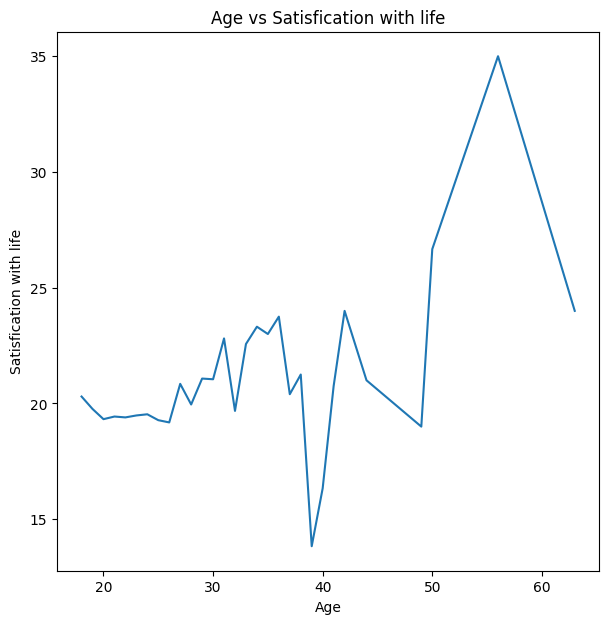

In [34]:
plt.figure(figsize=(7,7))
df.groupby('Age')['SWL_T'].mean().plot()
plt.title("Age vs Satisfication with life")
plt.xlabel("Age")
plt.ylabel("Satisfication with life");

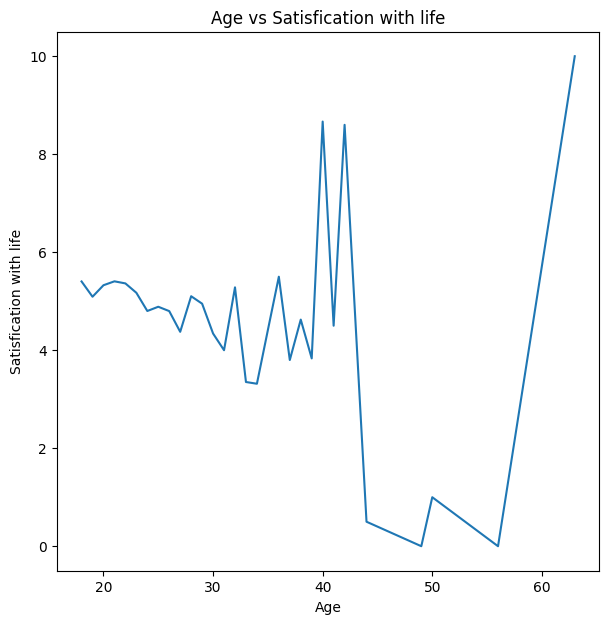

In [35]:
plt.figure(figsize=(7,7))
df.groupby('Age')['GAD_T'].mean().plot()
plt.title("Age vs Satisfication with life")
plt.xlabel("Age")
plt.ylabel("Satisfication with life");

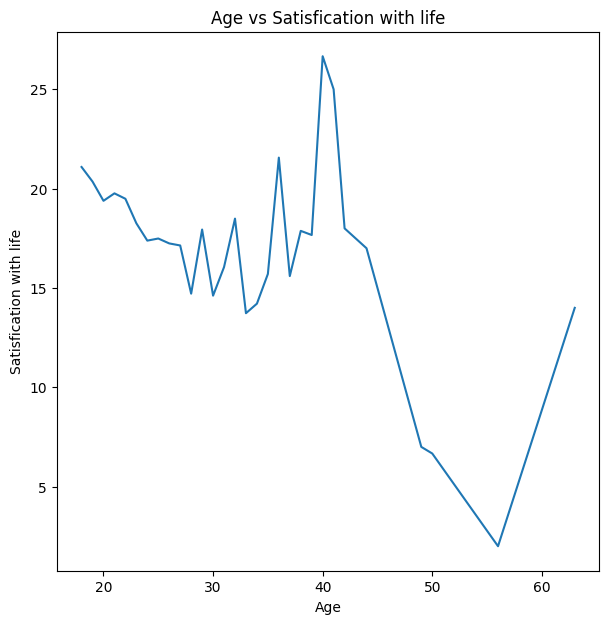

In [36]:
plt.figure(figsize=(7,7))
df.groupby('Age')['SPIN_T'].mean().plot()
plt.title("Age vs Satisfication with life")
plt.xlabel("Age")
plt.ylabel("Satisfication with life");

In [37]:
fig = px.scatter(df.head(5000),x = 'whyplay' , y='Age' , 
            color = 'Gender' ,size='Age' , title= 'CATEGORY VS Age')
fig.show()

In [38]:
fig = px.histogram(df.head(50), x='Game',
                color="Age", title='the Age for Games')
fig.show()

## Hours column Analysis :

In [39]:
h = df.groupby('Hours')[['SWL_T','GAD_T','SPIN_T']].mean().reset_index()

In [40]:
fig = px.line(h , x ='Hours' , y = 'SWL_T' )
fig.show()

In [41]:
fig = px.line(h , x ='Hours' , y = 'GAD_T' )
fig.show()

In [42]:
fig = px.line(h , x ='Hours' , y = 'SPIN_T' )
fig.show()

In [43]:
g = df.groupby('Game')['Hours'].mean().reset_index()
fig =px.bar(g ,x = 'Game', y='Hours' , title = 'avrage hours for each game')
fig.show()            

In [44]:
fig = px.scatter(df.head(5000),x = 'whyplay' , y='Hours' , 
            color = 'Gender' ,size='Age' , title= 'CATEGORY VS Age')
fig.show()

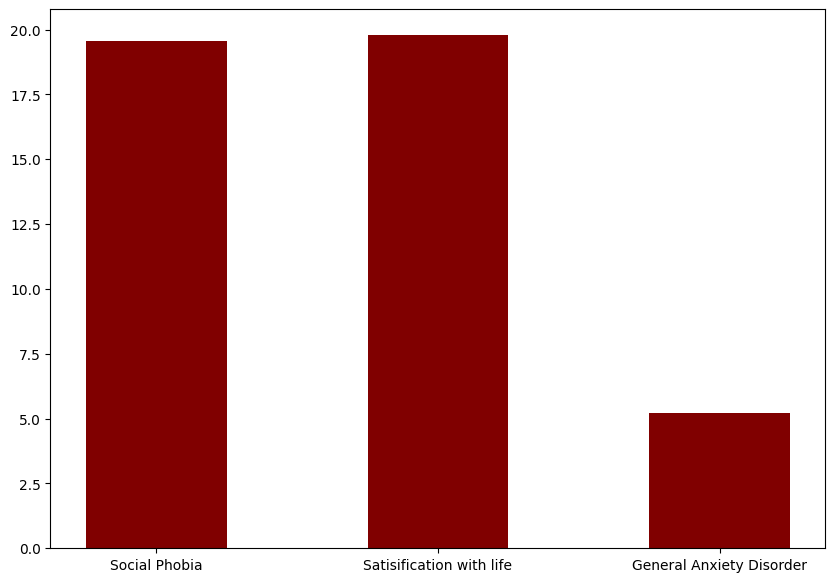

In [45]:
x=df.SPIN_T.mean()
y = df.SWL_T.mean()
z = df.GAD_T.mean()
c=[x,y,z]
plt.figure(figsize=(10,7))
plt.bar(['Social Phobia','Satisification with life','General Anxiety Disorder'],c,color ='maroon',
        width = 0.5)
plt.show()

## Handling outliers:

#### Age column:

<Axes: xlabel='Age'>

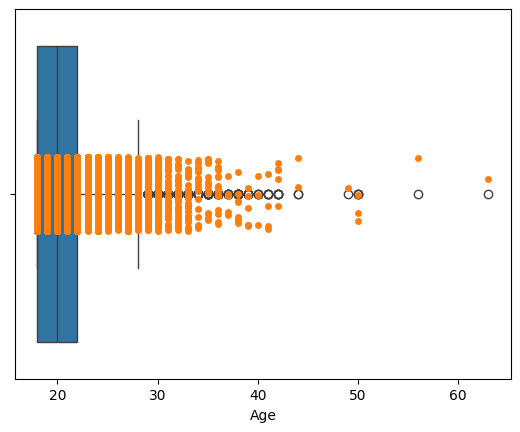

In [46]:
sns.boxplot(x='Age' , data = df)
sns.stripplot(x = 'Age' , data = df)

#### Hours column

<Axes: xlabel='Hours'>

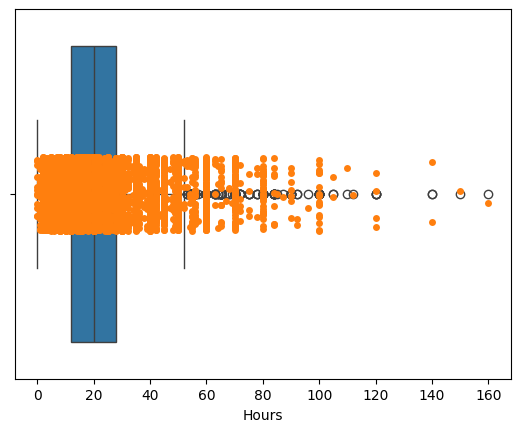

In [47]:
sns.boxplot(x='Hours' , data = df)
sns.stripplot(x = 'Hours' , data = df)

In [48]:
outlier_indices = detect_outliers(df , 0 , ['Hours'])
len(outlier_indices)

414

In [49]:
df.drop( df[df['Age'] > 50].index , axis = 0 , inplace=True)
df.drop( df[df['Hours'] > 100].index , axis = 0 , inplace=True)

In [50]:
df.to_csv('Online Gaming Anxiety new.csv' , index= False)

### preparation for machine learning:

In [51]:
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])



In [52]:
df.head()

GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  GADE  SWL1  SWL2  ...  SPIN17  \
0     0     0     0     0     1     0     0     1     3     5  ...     0.0   
1     1     2     2     2     0     1     0     2     3     5  ...     2.0   
2     0     2     2     0     0     3     1     1     2     6  ...     2.0   
3     0     0     0     0     0     0     0     1     2     5  ...     0.0   
4     2     1     2     2     2     3     2     3     2     2  ...     0.0   

   Narcissism  Gender  Age  Work  Residence  Playstyle  GAD_T  SWL_T  SPIN_T  
0         1.0       1   25     3        103          5      1     23     5.0  
1         1.0       1   41     3        103          3      8     16    33.0  
2         4.0       0   32     0         34          5      8     17    31.0  
3         2.0       1   28     0        103          1      0     17    11.0  
4         1.0       1   19     0         90          3     14     14    13.0  

[5 rows x 45 columns]

<Axes: >

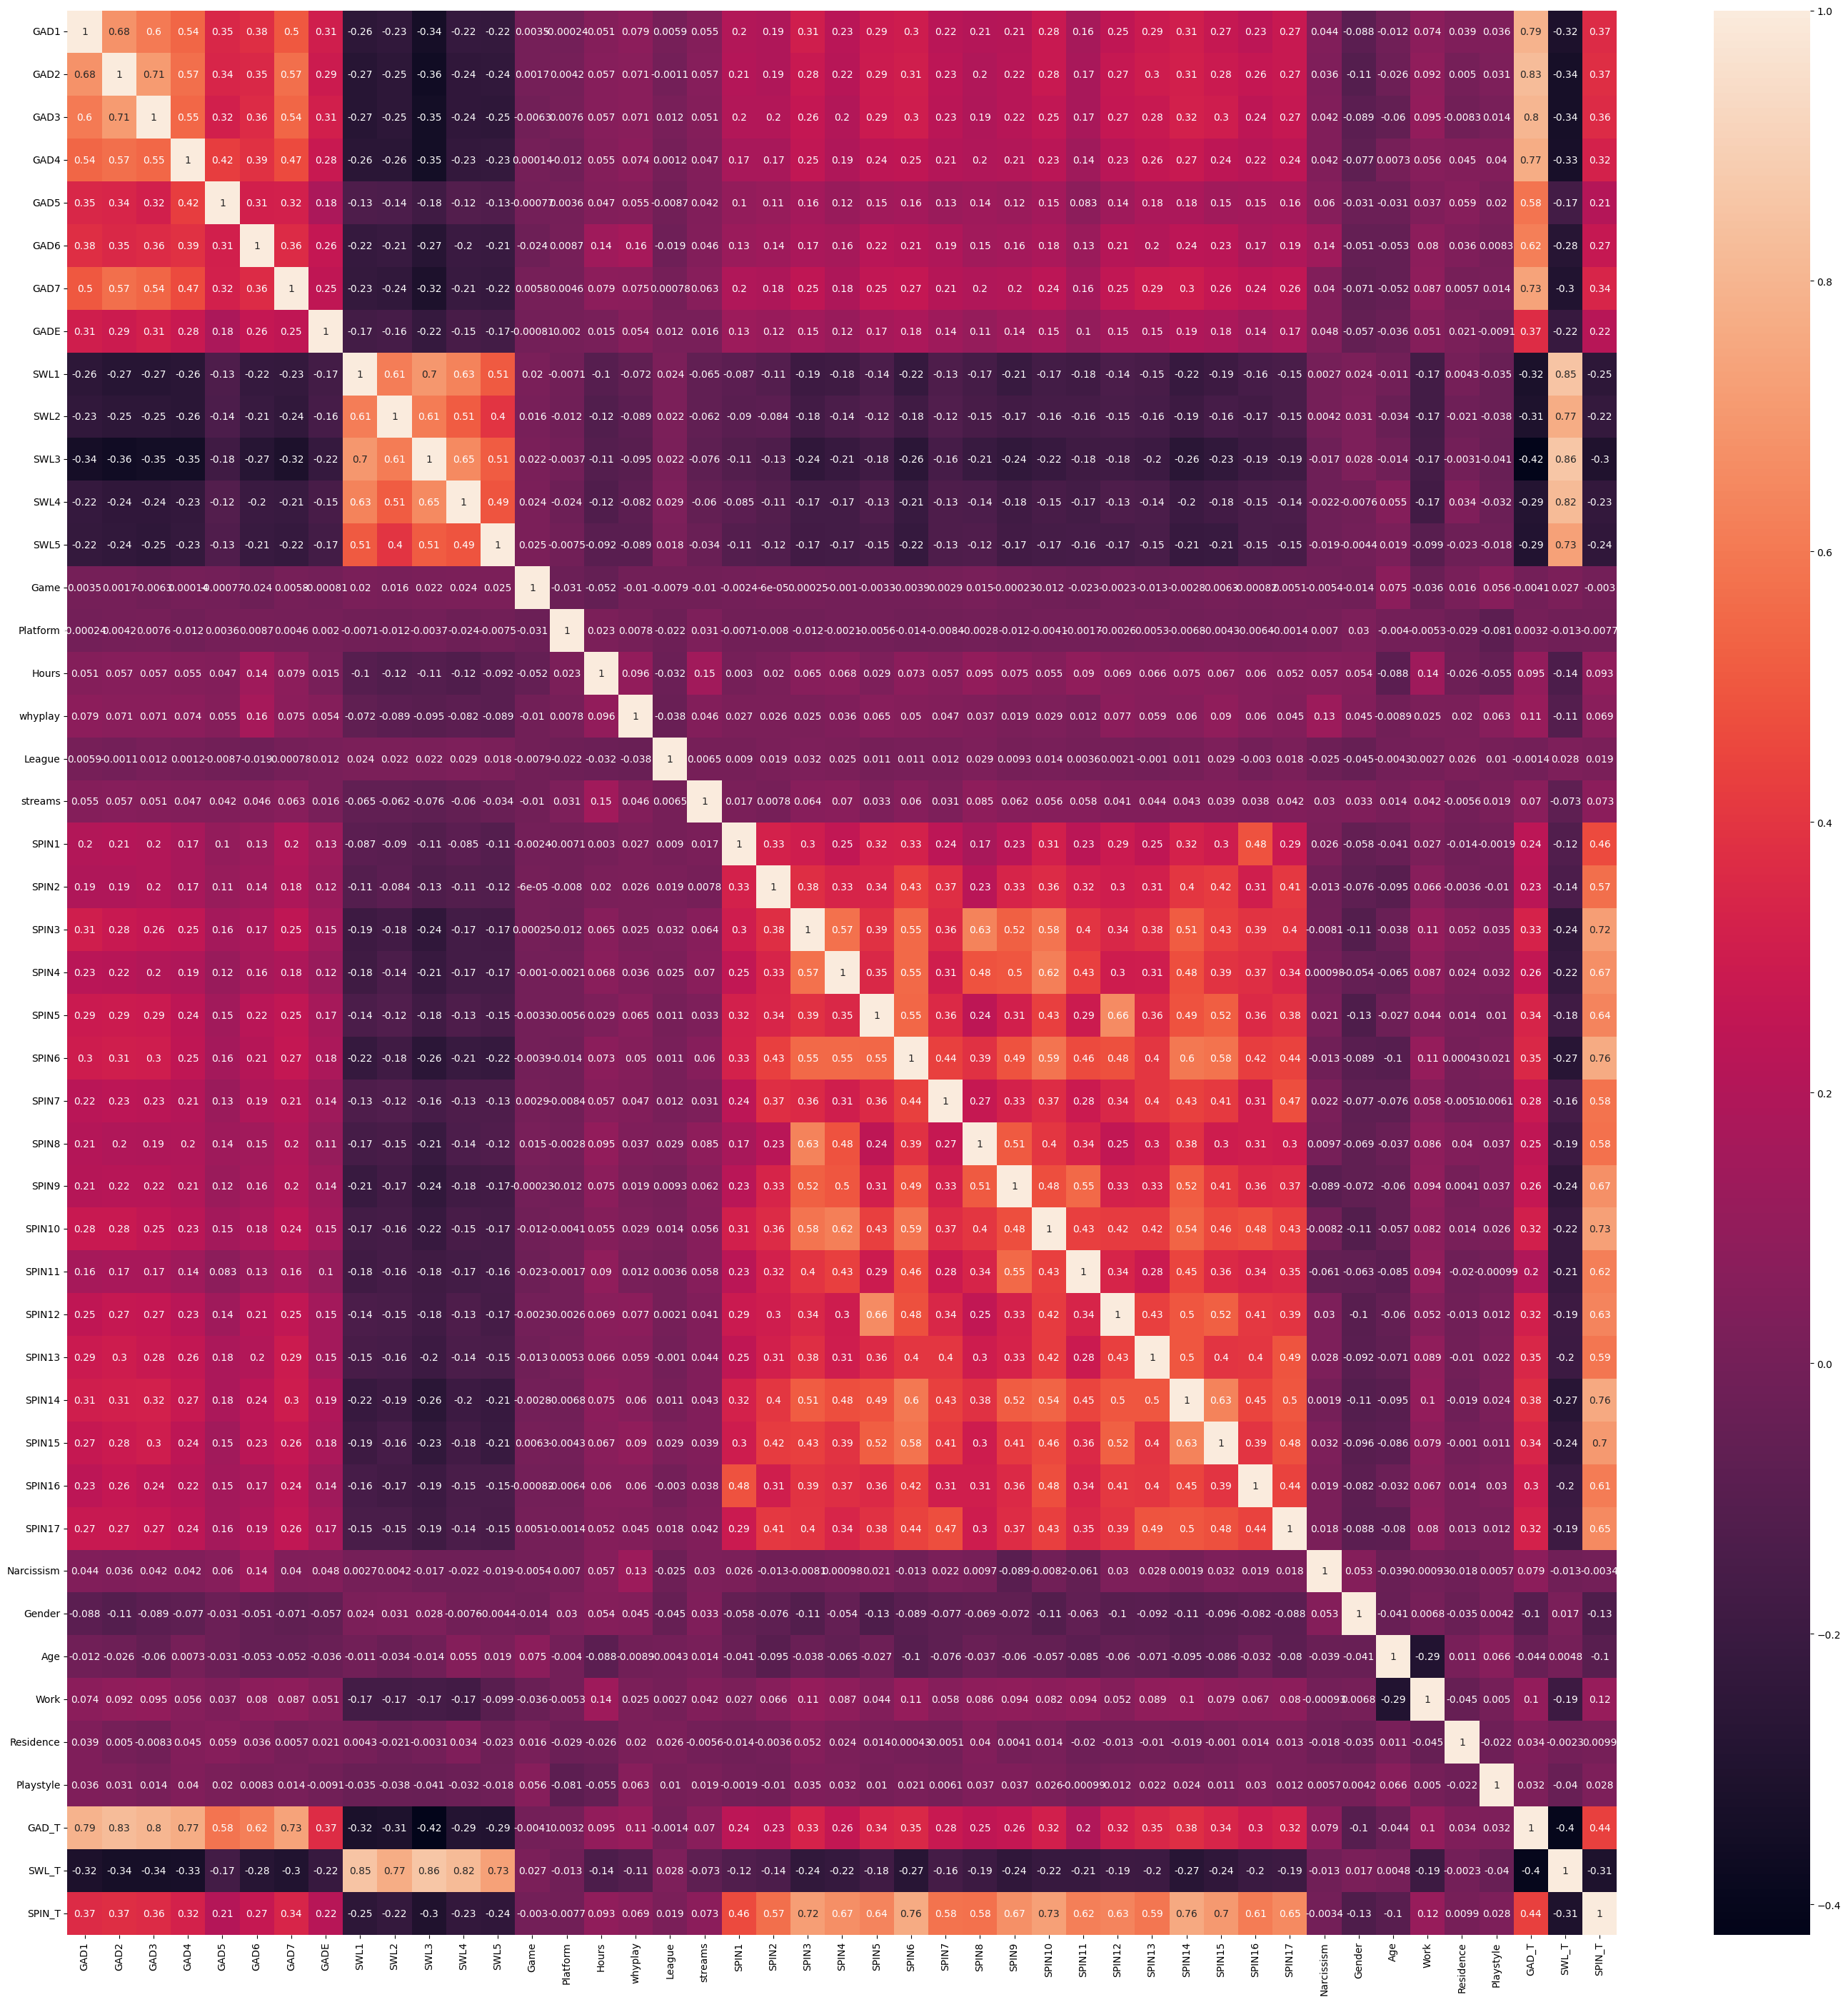

In [53]:
plt.figure(figsize = [35,35] )
sns.heatmap(df.corr() , annot = True)

In [54]:
df.columns

Index(['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GADE', 'SWL1',
       'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game', 'Platform', 'Hours', 'whyplay',
       'League', 'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5',
       'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12',
       'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Narcissism',
       'Gender', 'Age', 'Work', 'Residence', 'Playstyle', 'GAD_T', 'SWL_T',
       'SPIN_T'],
      dtype='object')

In [55]:
dfn = df[['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GADE', 'SWL1',
       'SWL2', 'SWL3', 'SWL4', 'SWL5' , 'Gender', 'Age' , 'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5',
       'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12',
       'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17' , 'GAD_T', 'SWL_T',
       'SPIN_T'  ]]

In [56]:
X = dfn.drop(['GAD_T' ,'SPIN_T' , 'SWL_T'] , axis = 1)
y = dfn[['GAD_T' , 'SPIN_T' , 'SWL_T']]

### Split data to train and test:

In [57]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.2 , random_state= 32)

In [58]:
X_train

GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  GADE  SWL1  SWL2  ...  SPIN8  \
1286      3     2     3     1     0     1     2     2     2     6  ...    3.0   
8788      0     1     1     0     0     0     0     2     6     5  ...    2.0   
2594      1     1     1     1     0     1     0     2     4     6  ...    2.0   
11814     0     0     0     0     0     0     0     1     3     5  ...    0.0   
2956      0     0     1     0     0     2     0     2     1     2  ...    3.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
4055      2     2     3     2     1     1     1     2     2     3  ...    4.0   
11215     1     1     2     2     0     0     2     2     5     4  ...    4.0   
9596      0     0     0     0     0     0     0     1     4     4  ...    0.0   
9842      0     0     0     1     0     1     0     1     3     2  ...    2.0   
11050     0     0     1     0     0     0     0     1     5     6  ...    0.0   

       SPIN9  SPIN10  SPIN11  SPIN12  SPIN13  SPIN14  SPIN15  SPIN16  SPIN17  
1286     2.0     3.0     3.0     1.0     0.0     2.0     0.0     2.0     0.0  
8788     2.0     0.0     2.0     0.0     0.0     2.0     1.0     1.0     0.0  
2594     1.0     1.0     1.0     1.0     2.0     1.0     3.0     2.0     1.0  
11814    1.0     0.0     1.0     1.0     0.0     0.0     0.0     1.0     0.0  
2956     3.0     1.0     4.0     1.0     1.0     2.0     1.0     0.0     1.0  
...      ...     ...     ...     ...     ...     ...     ...     ...     ...  
4055     2.0     2.0     4.0     1.0     0.0     3.0     4.0     0.0     2.0  
11215    4.0     2.0     1.0     3.0     3.0     4.0     4.0     0.0     3.0  
9596     1.0     2.0     0.0     0.0     0.0     1.0     0.0     0.0     1.0  
9842     2.0     0.0     1.0     0.0     0.0     2.0     1.0     0.0     0.0  
11050    0.0     1.0     1.0     1.0     0.0     1.0     1.0     0.0     1.0  

[10688 rows x 33 columns]

## Feature scaling:

In [59]:
sc = StandardScaler()
X_train_scaler = sc.fit_transform(X_train)
X_test_scaler = sc.transform(X_test)

In [60]:
X_train_scaler = pd.DataFrame(X_train_scaler , columns = sc.get_feature_names_out())
X_train_scaler

GAD1      GAD2      GAD3      GAD4      GAD5      GAD6      GAD7  \
0      2.309324  1.443864  2.048292  0.301806 -0.584404  0.097814  1.581193   
1     -0.934047  0.352645  0.026483 -0.782098 -0.584404 -0.975530 -0.657190   
2      0.147077  0.352645  0.026483  0.301806 -0.584404  0.097814 -0.657190   
3     -0.934047 -0.738574 -0.984421 -0.782098 -0.584404 -0.975530 -0.657190   
4     -0.934047 -0.738574  0.026483 -0.782098 -0.584404  1.171158 -0.657190   
...         ...       ...       ...       ...       ...       ...       ...   
10683  1.228200  1.443864  2.048292  1.385709  0.617233  0.097814  0.462001   
10684  0.147077  0.352645  1.037388  1.385709 -0.584404 -0.975530  1.581193   
10685 -0.934047 -0.738574 -0.984421 -0.782098 -0.584404 -0.975530 -0.657190   
10686 -0.934047 -0.738574 -0.984421  0.301806 -0.584404  0.097814 -0.657190   
10687 -0.934047 -0.738574  0.026483 -0.782098 -0.584404 -0.975530 -0.657190   

           GADE      SWL1      SWL2  ...     SPIN8     SPIN9    SPIN10  \
0      0.735755 -0.985105  0.820298  ...  1.169689  0.320067  1.850940   
1      0.735755  1.312506  0.231688  ...  0.441749  0.320067 -0.810668   
2      0.735755  0.163700  0.820298  ...  0.441749 -0.400573  0.076535   
3     -0.732184 -0.410702  0.231688  ... -1.014130 -0.400573 -0.810668   
4      0.735755 -1.559508 -1.534141  ...  1.169689  1.040708  0.076535   
...         ...       ...       ...  ...       ...       ...       ...   
10683  0.735755 -0.985105 -0.945531  ...  1.897629  0.320067  0.963737   
10684  0.735755  0.738103 -0.356922  ...  1.897629  1.761348  0.963737   
10685 -0.732184  0.163700 -0.356922  ... -1.014130 -0.400573  0.963737   
10686 -0.732184 -0.410702 -1.534141  ...  0.441749  0.320067 -0.810668   
10687 -0.732184  0.738103  0.820298  ... -1.014130 -1.121214  0.076535   

         SPIN11    SPIN12    SPIN13    SPIN14    SPIN15    SPIN16    SPIN17  
0      0.796200  0.102717 -0.566103  0.629840 -1.032573  1.451917 -0.782906  
1      0.127087 -0.762408 -0.566103  0.629840 -0.292389  0.405236 -0.782906  
2     -0.542027  0.102717  1.553535 -0.198579  1.187978  1.451917  0.065573  
3     -0.542027  0.102717 -0.566103 -1.026998 -1.032573  0.405236 -0.782906  
4      1.465314  0.102717  0.493716  0.629840 -0.292389 -0.641444  0.065573  
...         ...       ...       ...       ...       ...       ...       ...  
10683  1.465314  0.102717 -0.566103  1.458259  1.928162 -0.641444  0.914052  
10684 -0.542027  1.832968  2.613354  2.286678  1.928162 -0.641444  1.762531  
10685 -1.211141 -0.762408 -0.566103 -0.198579 -1.032573 -0.641444  0.065573  
10686 -0.542027 -0.762408 -0.566103  0.629840 -0.292389 -0.641444 -0.782906  
10687 -0.542027  0.102717 -0.566103 -0.198579 -0.292389 -0.641444  0.065573  

[10688 rows x 33 columns]

## Make a simple model just for fun :

In [61]:
X_test_scaler = pd.DataFrame(X_test_scaler , columns = sc.get_feature_names_out())
X_test_scaler


GAD1      GAD2      GAD3      GAD4      GAD5      GAD6      GAD7  \
0     0.147077 -0.738574  0.026483  0.301806 -0.584404  0.097814  0.462001   
1     0.147077  0.352645 -0.984421  0.301806 -0.584404  1.171158  0.462001   
2     0.147077  0.352645  0.026483  0.301806 -0.584404  1.171158  2.700384   
3     0.147077  2.535084  2.048292  0.301806  0.617233  1.171158  1.581193   
4    -0.934047 -0.738574 -0.984421 -0.782098 -0.584404  0.097814 -0.657190   
...        ...       ...       ...       ...       ...       ...       ...   
2668 -0.934047 -0.738574  1.037388 -0.782098  1.818871  0.097814  1.581193   
2669 -0.934047 -0.738574 -0.984421 -0.782098 -0.584404  0.097814 -0.657190   
2670 -0.934047 -0.738574  0.026483 -0.782098 -0.584404  1.171158  0.462001   
2671  0.147077  0.352645  0.026483  0.301806  0.617233  0.097814  0.462001   
2672 -0.934047 -0.738574  0.026483 -0.782098 -0.584404  1.171158  2.700384   

          GADE      SWL1      SWL2  ...     SPIN8     SPIN9    SPIN10  \
0     0.735755 -0.410702 -0.945531  ...  0.441749  0.320067 -0.810668   
1    -0.732184 -0.985105 -0.945531  ...  1.169689  1.040708  0.076535   
2     2.203694 -0.985105 -2.122751  ...  0.441749  1.761348  2.738143   
3     0.735755 -1.559508 -0.356922  ... -0.286190  0.320067  0.963737   
4    -0.732184 -0.410702  0.820298  ...  0.441749 -0.400573 -0.810668   
...        ...       ...       ...  ...       ...       ...       ...   
2668  0.735755  0.163700  0.231688  ... -1.014130 -0.400573 -0.810668   
2669 -0.732184 -0.985105  0.231688  ...  1.897629  0.320067 -0.810668   
2670 -0.732184  1.312506  1.408907  ... -0.286190 -0.400573  0.076535   
2671  0.735755 -0.410702 -1.534141  ...  1.897629  1.761348  0.076535   
2672 -0.732184 -0.985105  1.408907  ...  0.441749 -1.121214 -0.810668   

        SPIN11    SPIN12    SPIN13    SPIN14    SPIN15    SPIN16    SPIN17  
0     0.127087  0.967843 -0.566103 -1.026998 -1.032573 -0.641444 -0.782906  
1     1.465314  0.102717  2.613354  1.458259  1.187978  1.451917  0.914052  
2     1.465314  0.102717 -0.566103  1.458259  1.187978  3.545278  1.762531  
3    -1.211141 -0.762408  2.613354  0.629840  0.447794  1.451917  0.065573  
4    -0.542027 -0.762408 -0.566103 -1.026998 -1.032573 -0.641444 -0.782906  
...        ...       ...       ...       ...       ...       ...       ...  
2668  1.465314  0.967843 -0.566103  1.458259 -1.032573  0.405236 -0.782906  
2669 -0.542027 -0.762408  1.553535 -0.198579 -1.032573 -0.641444  0.065573  
2670 -0.542027 -0.762408 -0.566103 -0.198579 -1.032573 -0.641444 -0.782906  
2671  1.465314 -0.762408 -0.566103  0.629840 -0.292389  0.405236  0.065573  
2672 -0.542027 -0.762408 -0.566103 -1.026998  0.447794 -0.641444  0.914052  

[2673 rows x 33 columns]

In [62]:
lr = LinearRegression()
lr.fit(X_train_scaler ,y_train)
y_pred = lr.predict(X_test_scaler)

In [63]:
y_pred

array([[ 5.        ,  8.39792975, 14.        ],
       [ 6.        , 38.01457385, 12.        ],
       [ 9.        , 41.69485659,  9.        ],
       ...,
       [ 4.        , 17.90009721, 29.        ],
       [ 7.        , 27.62259482, 14.        ],
       [ 6.        ,  7.74307264, 21.        ]])

In [64]:
y_test

GAD_T  SPIN_T  SWL_T
1410       5     8.0     14
4473       6    39.0     12
597        9    42.0      9
11258     13    14.0      9
8129       1     6.0     21
...      ...     ...    ...
337        7    18.0     22
182        1    21.0     15
4967       4    18.0     29
1121       7    28.0     14
6592       6     7.0     21

[2673 rows x 3 columns]

In [65]:
df.to_csv('Online Gaming Anxiety.csv' , index= False)